In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [5]:
%matplotlib inline
sns.set(style="whitegrid")

In [3]:
# load cleaned data
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,Unnamed: 0,tweet_id,timestamp,source,text,expanded_urls,name,ratings,dog_stage,jpg_url,img_num,p1,p1_conf,id,retweets,likes
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,1.3,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,892420643555336193,7745,36427
1,1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,1.3,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,892177421306343426,5737,31368
2,2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,1.2,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,891815181378084864,3798,23640
3,3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,1.3,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper Towel,0.170278,891689557279858688,7902,39740
4,4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,1.2,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,891327558926688256,8539,37932


### Q1: Which is the most popular dog stage?

In [28]:
# Group data by dog stage
df1 = df.groupby(['dog_stage'])['likes'].mean()

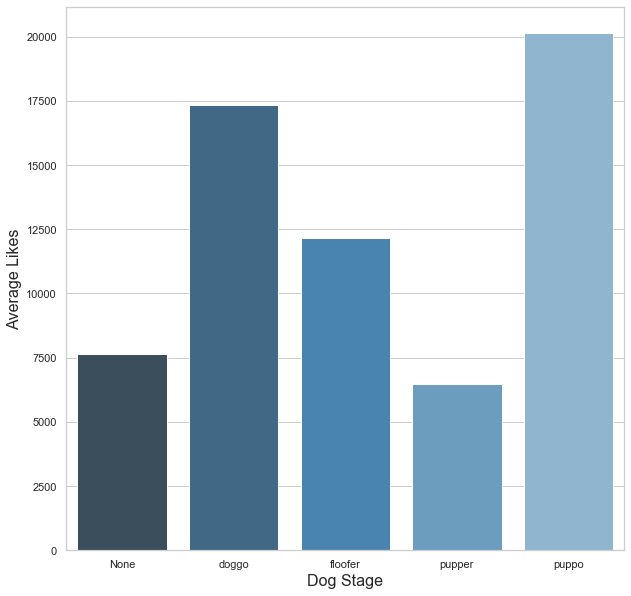

In [29]:
fig = plt.figure(figsize = (10, 10))
sns.barplot(df1.index, df1.values, palette="Blues_d")
plt.xlabel('Dog Stage', fontsize = 16)
plt.ylabel('Average Likes', fontsize = 16);
fig.savefig('dog_stage.jpg')

Puppo is the most polular dog stage!

### Q2: Which is the most rated dog breed?

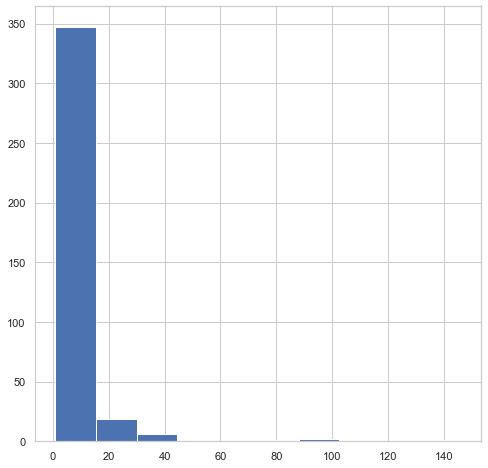

In [34]:
df.p1.value_counts().hist(figsize = (8, 8));

In [40]:
# From the histgram above, filter dog breeds contains more than 20 entries.
df2 = df.groupby(['p1']).filter(lambda x: len(x) >= 20)
df3 = df2.p1.value_counts()

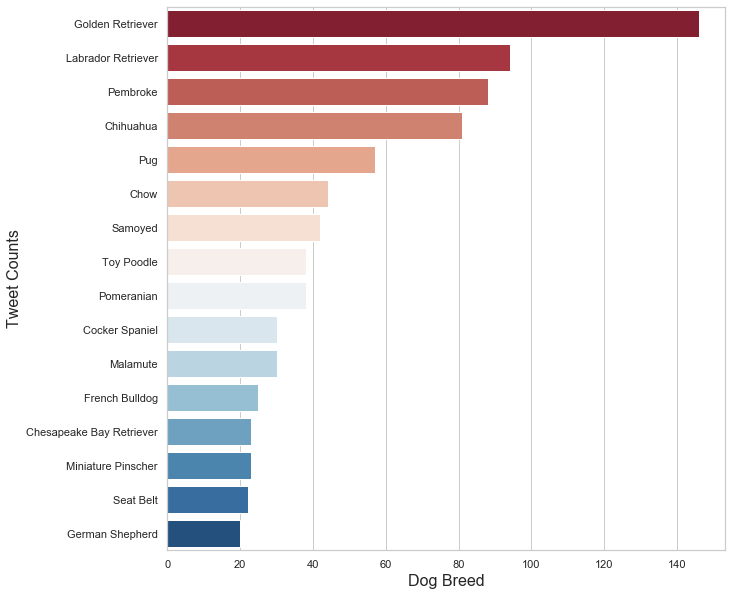

In [46]:
fig = plt.figure(figsize = (10, 10))
sns.barplot(df3.values, df3.index, palette="RdBu")
plt.xlabel('Dog Breed', fontsize = 16)
plt.ylabel('Tweet Counts', fontsize = 16);
fig.savefig('dog_breed.jpg')

Golden retriever is the most rated dog breed!

#### Bonus: What is the average rating for popular breeds?

In [87]:
# Get the average rating for popular breads
df4 = df2.groupby(['p1'])['ratings'].mean()
df4 = df4.sort_values(axis = 0, ascending=False)
df4

p1
Samoyed                     1.173810
Chow                        1.163636
Golden Retriever            1.163356
Pembroke                    1.144318
Cocker Spaniel              1.140000
French Bulldog              1.124000
Pomeranian                  1.115263
Labrador Retriever          1.110638
Toy Poodle                  1.110526
German Shepherd             1.100000
Malamute                    1.090000
Chesapeake Bay Retriever    1.078261
Chihuahua                   1.075309
Miniature Pinscher          1.065217
Pug                         1.031579
Seat Belt                   0.918182
Name: ratings, dtype: float64

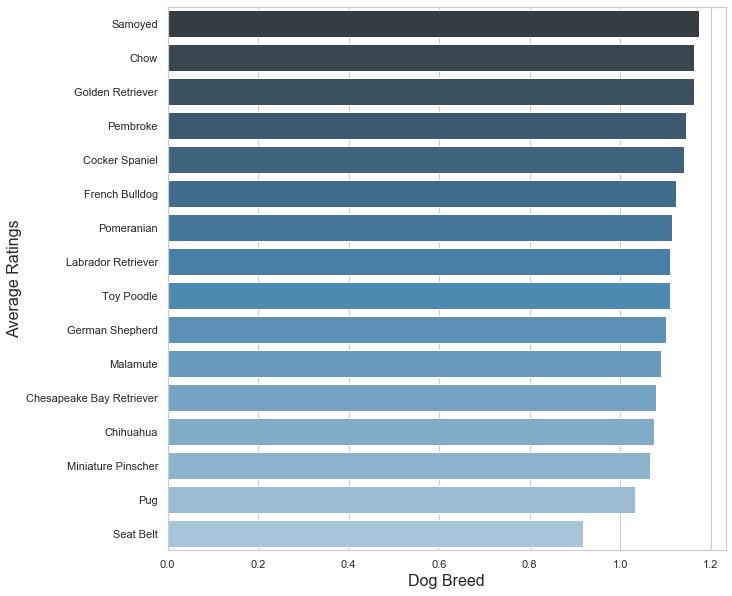

In [89]:
fig = plt.figure(figsize = (10, 10))
sns.barplot(df4.values, df4.index, palette="Blues_d")
plt.xlabel('Dog Breed', fontsize = 16)
plt.ylabel('Average Ratings', fontsize = 16);
fig.savefig('dog_rating.jpg')

### Q3: When the account is the most active during a day?

In [96]:
# Extract hourly tweets number
df['hour'] = df.timestamp.dt.hour
df1 = df.hour.value_counts()

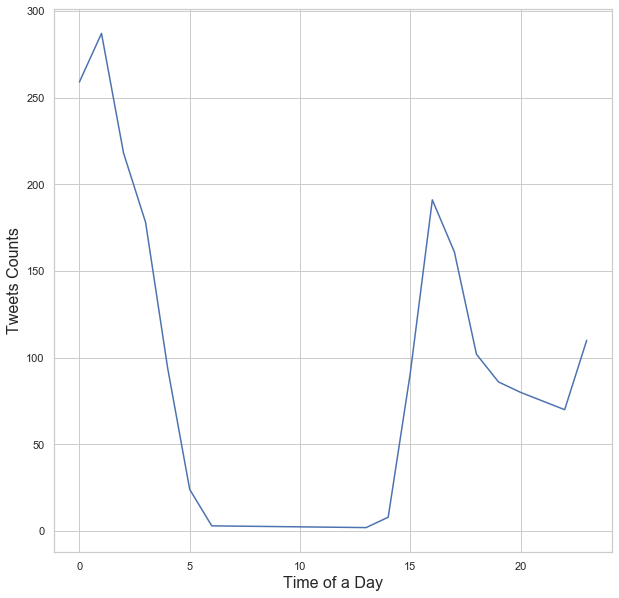

In [97]:
fig = plt.figure(figsize = (10, 10))
sns.lineplot(df1.index, df1.values)
plt.xlabel('Time of a Day', fontsize = 16)
plt.ylabel('Tweets Counts', fontsize = 16);
fig.savefig('account.jpg')

It seems like the account is becoming more active after 2pm, and the most active during 1am. Wow! 